## Тема “Обучение без учителя”

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

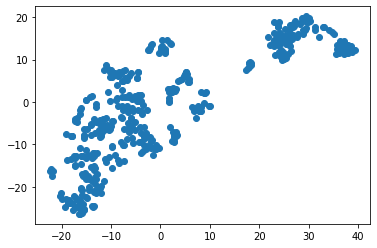

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
%matplotlib inline
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns=feature_names)
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

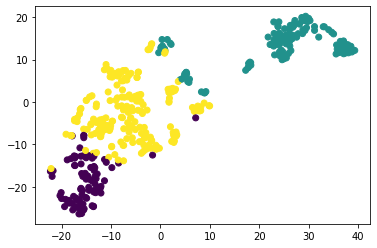

Первый кластер price:  27.78837209302326
Первый кластер CRIM:  0.07356558139534884

Второй кластер price: 16.165354330708663
Второй кластер CRIM: 10.797028425196851

Третий кластер price: 24.958115183246072
Третий кластер CRIM: 0.4216602094240837


In [14]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_model = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_model)
plt.show()
print('Первый кластер price: ', y_train['price'][labels_model == 0].mean())
print('Первый кластер CRIM: ', X_train['CRIM'][labels_model == 0].mean())
print()
print('Второй кластер price:', y_train['price'][labels_model == 1].mean())
print('Второй кластер CRIM:', X_train['CRIM'][labels_model == 1].mean())
print()
print('Третий кластер price:', y_train['price'][labels_model == 2].mean())
print('Третий кластер CRIM:', X_train['CRIM'][labels_model == 2].mean())

### *Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

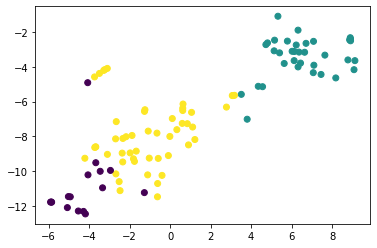

Первый кластер price:  31.35
Первый кластер CRIM:  0.06206

Второй кластер price: 16.43714285714286
Второй кластер CRIM: 10.165531142857143

Третий кластер price: 21.860784313725492
Третий кластер CRIM: 0.2660788235294118


In [16]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_model = model.predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_model)
plt.show()
print('Первый кластер price: ', y_test['price'][labels_model == 0].mean())
print('Первый кластер CRIM: ', X_test['CRIM'][labels_model == 0].mean())
print()
print('Второй кластер price:', y_test['price'][labels_model == 1].mean())
print('Второй кластер CRIM:', X_test['CRIM'][labels_model == 1].mean())
print()
print('Третий кластер price:', y_test['price'][labels_model == 2].mean())
print('Третий кластер CRIM:', X_test['CRIM'][labels_model == 2].mean())